# Imports

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns


# Reading the Data

In [19]:
# Load the dataset
data = pd.read_csv("TRAFFIC VOLUME DATA KATRUGUPPE SIGNAL  STRECH 1-4(PCU).csv")

# Check for missing values
print(data.isnull().sum())

# No missing values found, so no need for imputation


Start_Time    0
End_Time      0
MOTORCYCLE    0
AUTO          0
CAR           0
BUS           0
LCV           0
TRUCK         0
dtype: int64


# Describing the Data

In [20]:

# Summary statistics
print(data.describe())

       Start_Time   End_Time  MOTORCYCLE        AUTO         CAR         BUS  \
count   35.000000  35.000000   35.000000   35.000000   35.000000   35.000000   
mean    13.771429  15.771429  391.657143  222.942857  346.628571  117.942857   
std      5.128271   5.128271  220.754181  153.484037  278.328423  120.107536   
min      6.000000   8.000000   43.000000   37.000000   45.000000    3.000000   
25%     10.000000  12.000000  197.500000   98.000000  131.500000   15.000000   
50%     14.000000  16.000000  336.000000  147.000000  190.000000   42.000000   
75%     18.000000  20.000000  608.500000  365.000000  642.500000  244.500000   
max     22.000000  24.000000  783.000000  579.000000  887.000000  333.000000   

             LCV      TRUCK  
count  35.000000  35.000000  
mean   15.828571   9.057143  
std    11.673211   9.276608  
min     0.000000   0.000000  
25%     5.000000   0.000000  
50%    18.000000   5.000000  
75%    26.000000  18.000000  
max    35.000000  27.000000  


# Data Visualization

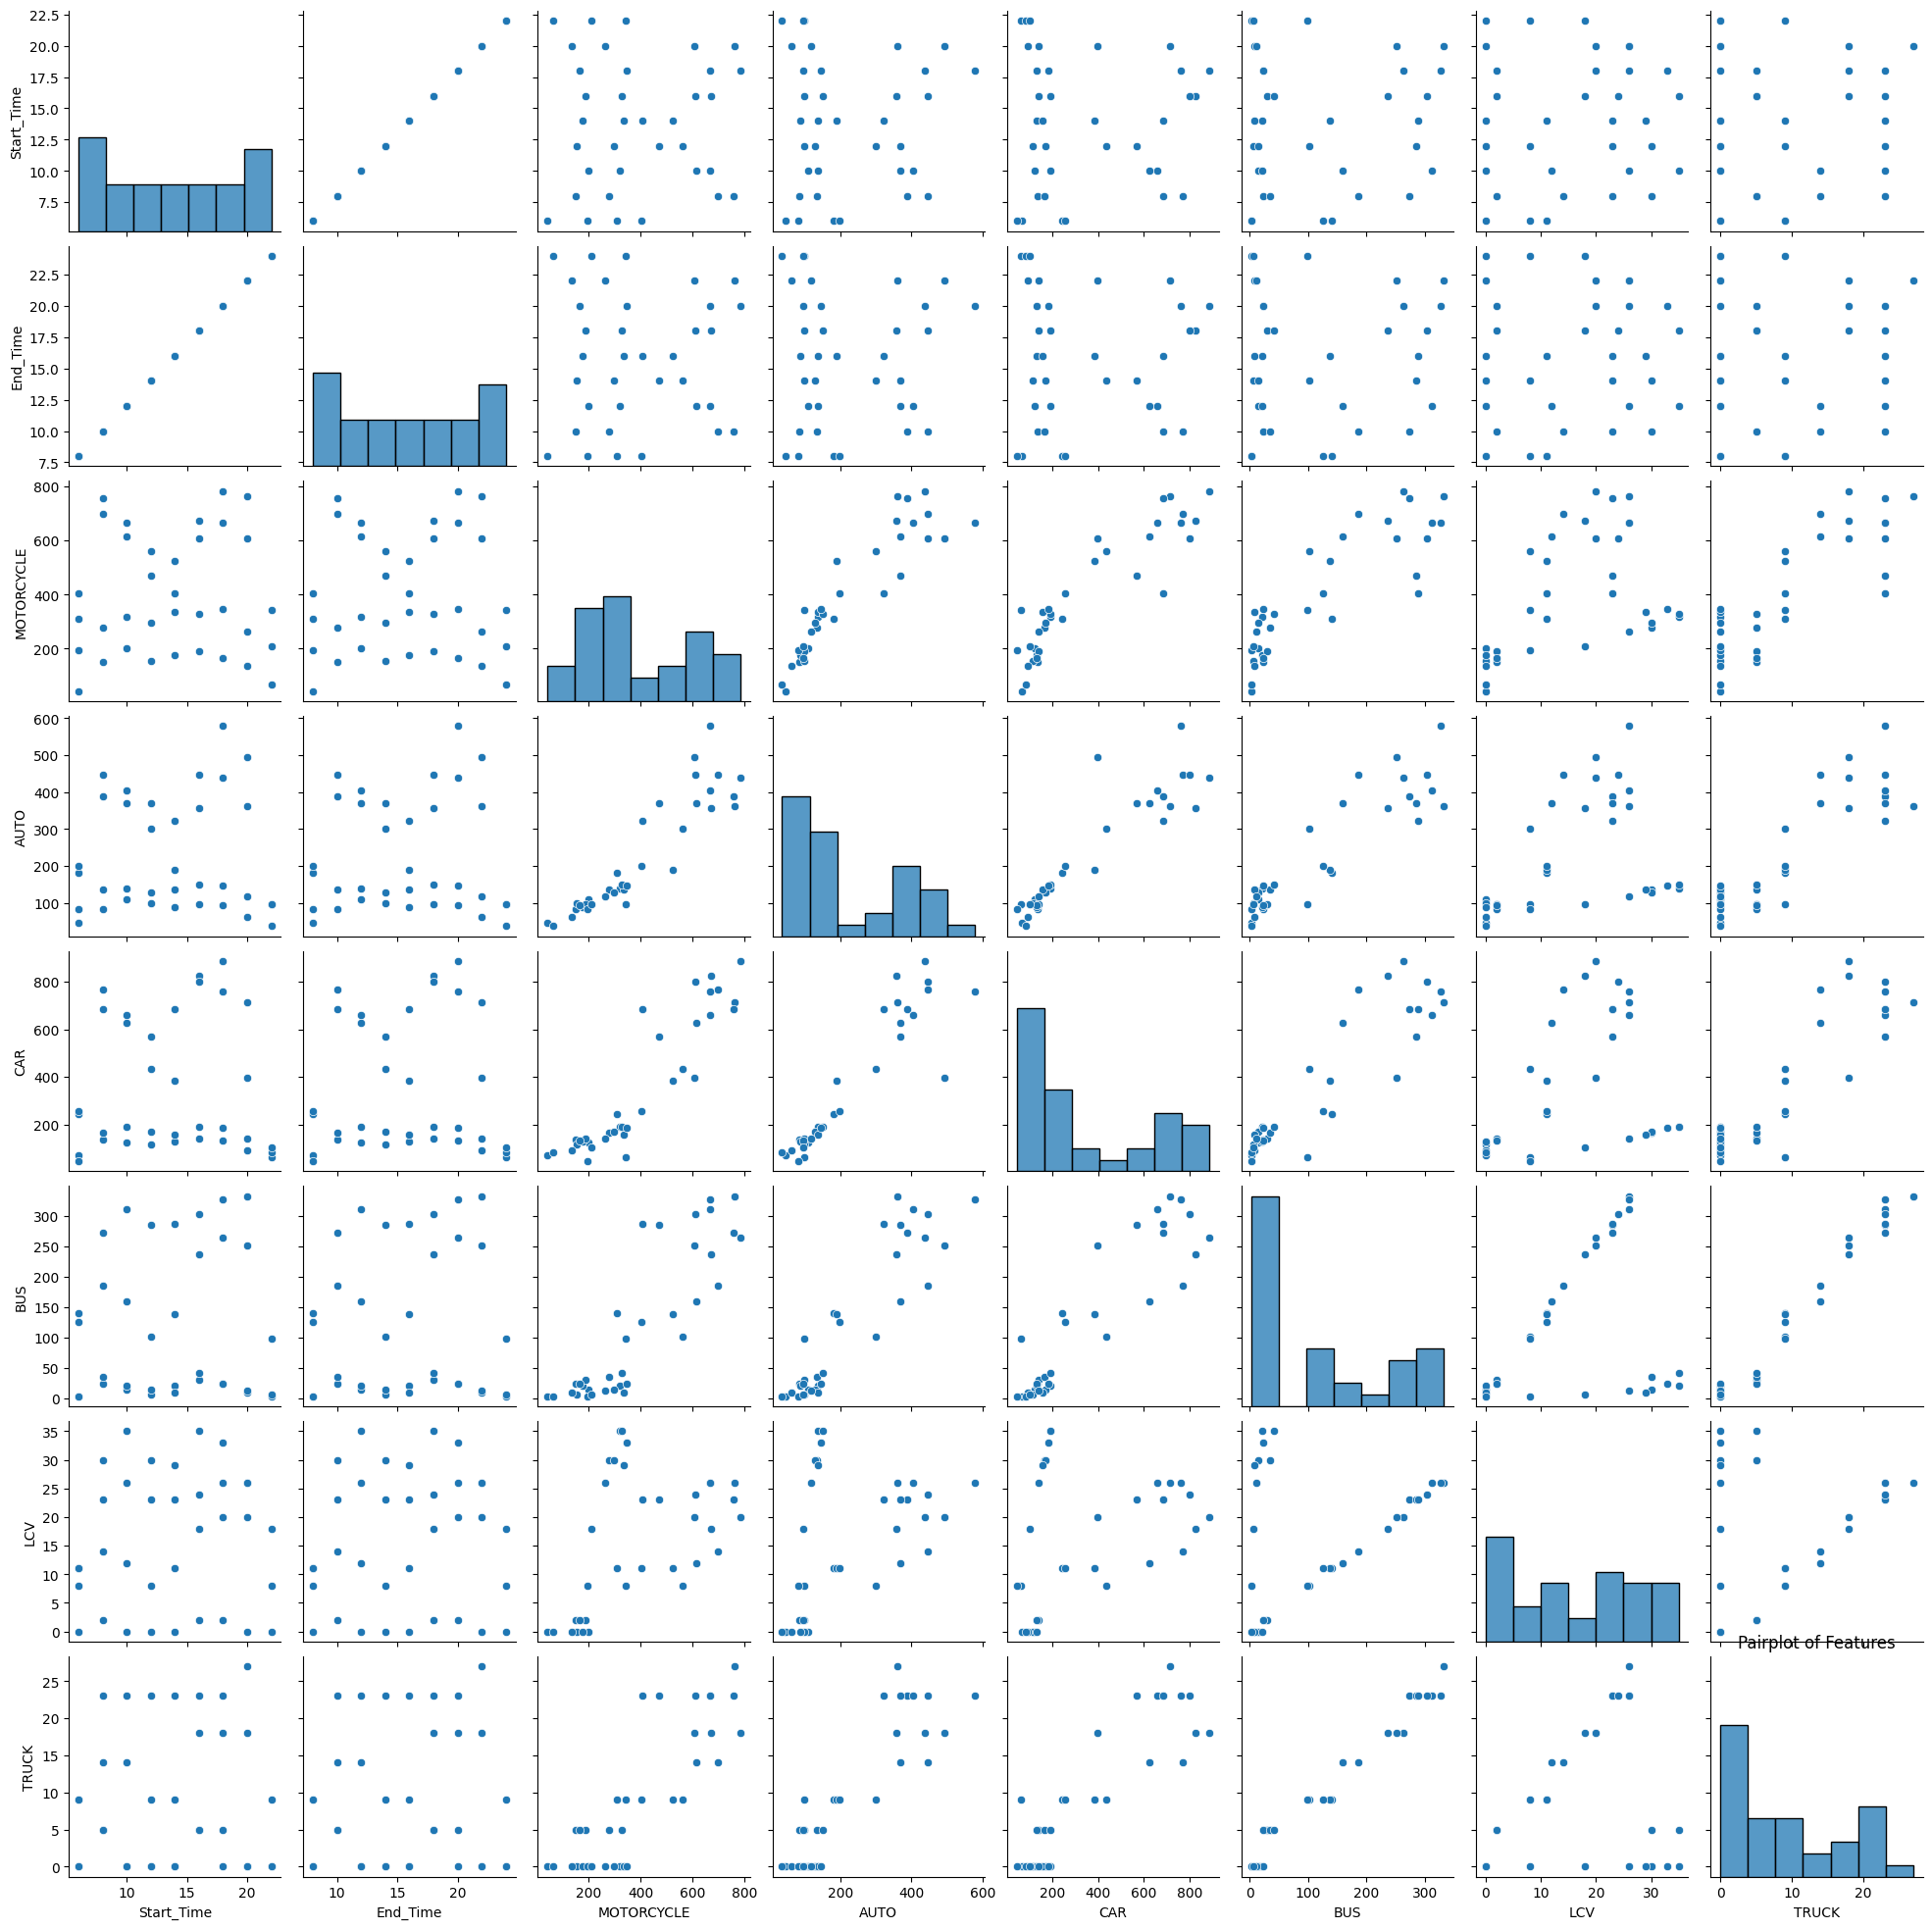

In [22]:
sns.pairplot(data)
plt.title("Pairplot of Features")
plt.show()



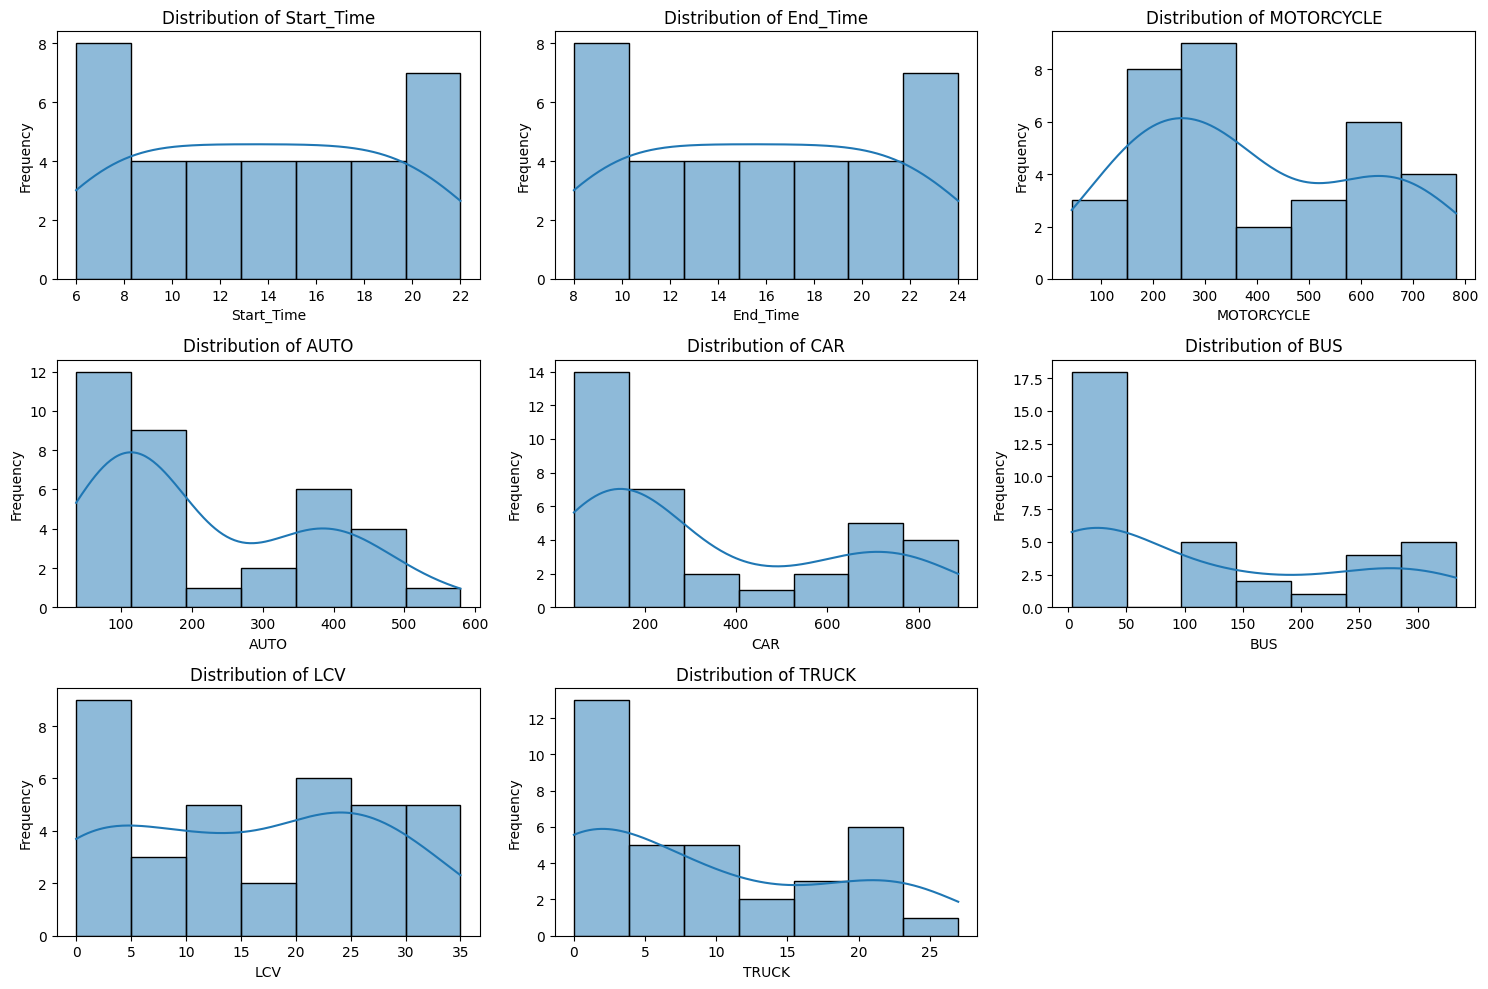

In [24]:
# Distribution plots for each feature
features = ['Start_Time', 'End_Time', 'MOTORCYCLE', 'AUTO', 'CAR', 'BUS', 'LCV', 'TRUCK']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


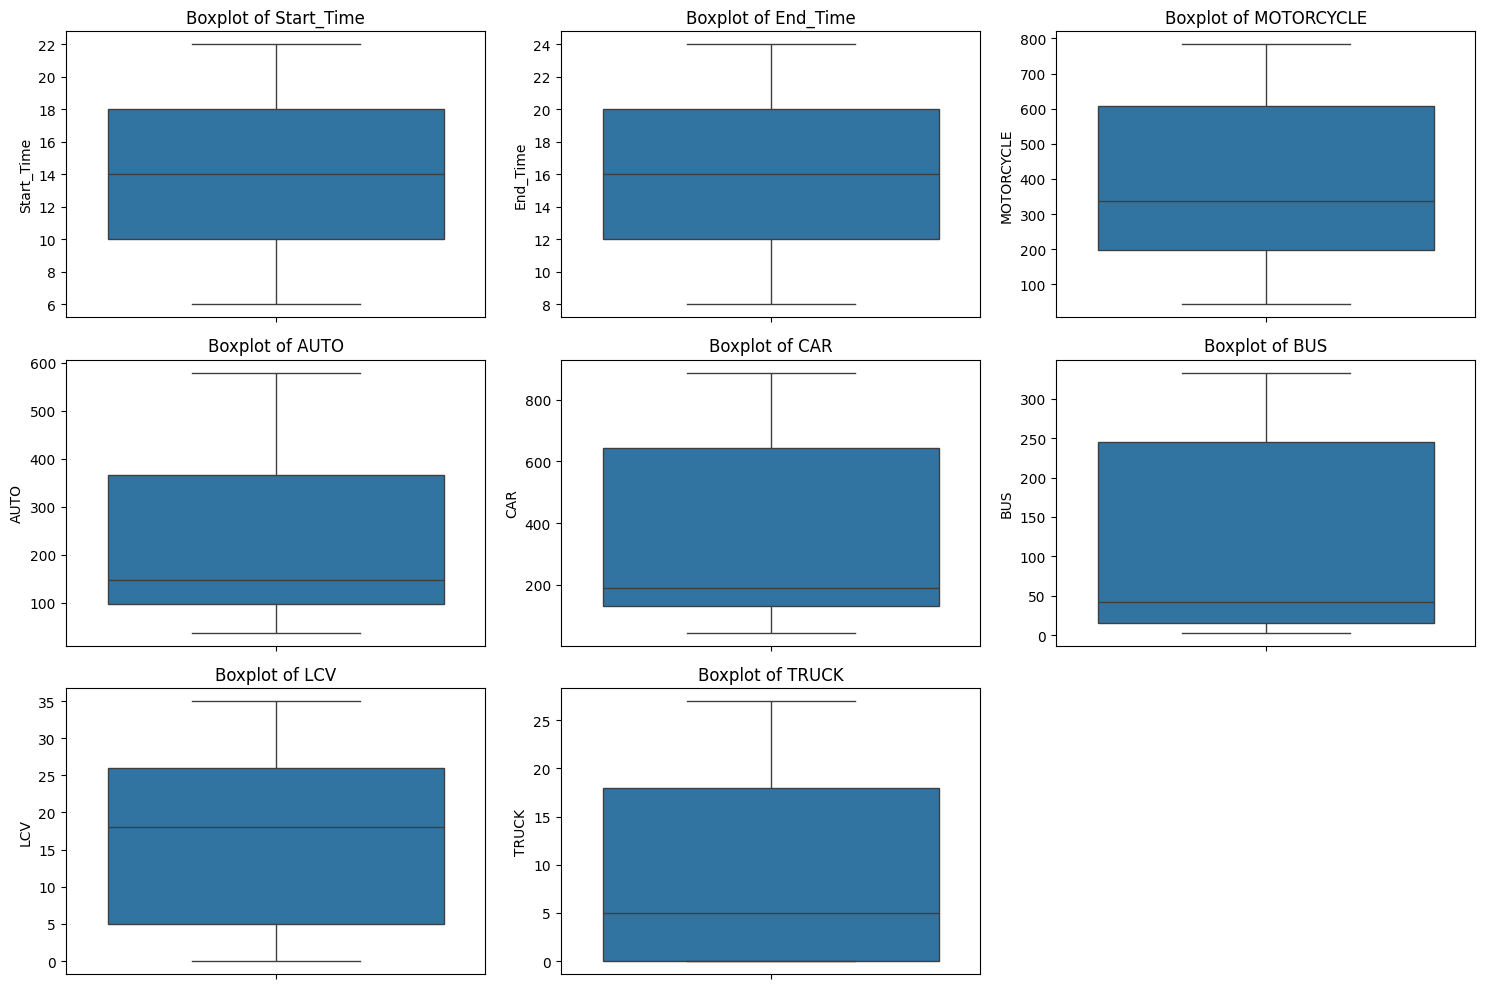

In [25]:
# Boxplot for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[feature])
    plt.title(f"Boxplot of {feature}")
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

# Correlation Heatmap


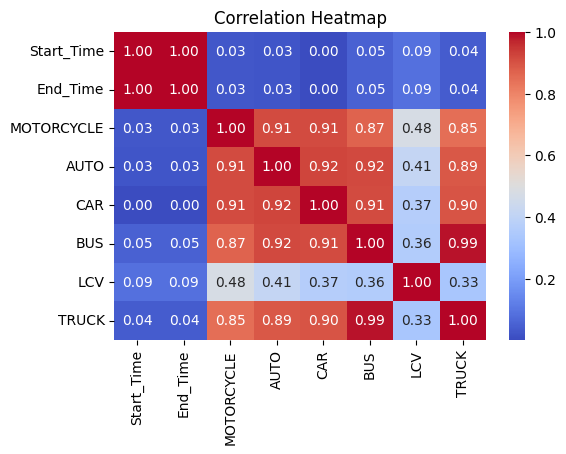

In [13]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Training the model


In [26]:
# Split data into features (X) and target (y)
X = data.drop('BUS', axis=1)  # Features
y = data['BUS']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Initialize and train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)


In [29]:
# Calculate Mean Squared Error and R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 533.4418285714283
R^2 Score: 0.9701713698827106


# Model Optimization

In [30]:

from sklearn.model_selection import GridSearchCV



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional, but recommended for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the random forest model with initial hyperparameters
model = RandomForestRegressor(n_estimators=100, max_depth=5)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 8],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error")  # Use negative MSE for maximization
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Further evaluation (optional):
# - Plot actual vs. predicted values
# - Calculate other metrics like R-squared

# Save the model (optional)
# import joblib
# joblib.dump(best_model, "your_model.pkl")


Mean Squared Error: 372.15279179397464


# Prediction


In [44]:

# Manually enter your data
new_data = pd.DataFrame({
    'Start_Time': ['22'],   
    'End_Time': ['24'],    
    'MOTORCYCLE': [344],    
    'AUTO': [98],           
    'CAR': [64],            
    'LCV': [8],            
    'TRUCK': [9]            
})

# Preprocess the new data (if necessary)
# Ensure that the preprocessing steps match those used during training

# Fit the StandardScaler with training data
scaler = StandardScaler()
scaler.fit(X_train)

# Standardize the features of new data
new_data_scaled = scaler.transform(new_data)

# Instantiate the RandomForestRegressor model
model = RandomForestRegressor()

# Fit the model with training data
model.fit(X_train_scaled, y_train)

# Make predictions with the trained model
new_predictions = model.predict(new_data_scaled)

# Print or use the predictions
print("No. of Cars:", str(new_predictions[0]))


No. of Cars: 81.12
